# Multilayer Perceptron Neural Network for Hand-written Digits Classifiaction



In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import MNIST data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

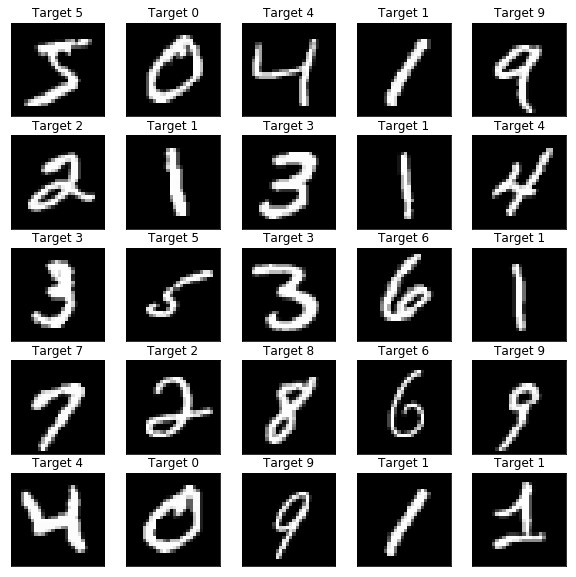

In [3]:
plt.figure(figsize=(10, 10))
for idx in range(25):
    plt.subplot(5, 5, idx+1)
    fig = plt.imshow(x_train[idx], cmap='gray')
    plt.title('Target {}'.format(y_train[idx]))
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

In [4]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Dense(10, activation='softmax')
                                   ])

model.compile(optimizer='adam',
              batch_size=512,
              shuffle=True,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3183 - accuracy: 0.9106
Epoch 2/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3075 - accuracy: 0.9134
Epoch 3/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3012 - accuracy: 0.9155
Epoch 4/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2955 - accuracy: 0.9169
Epoch 5/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2916 - accuracy: 0.9186
10000/1 - 0s - loss: 0.2205 - accuracy: 0.9207


[0.2917792740955949, 0.9207]

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


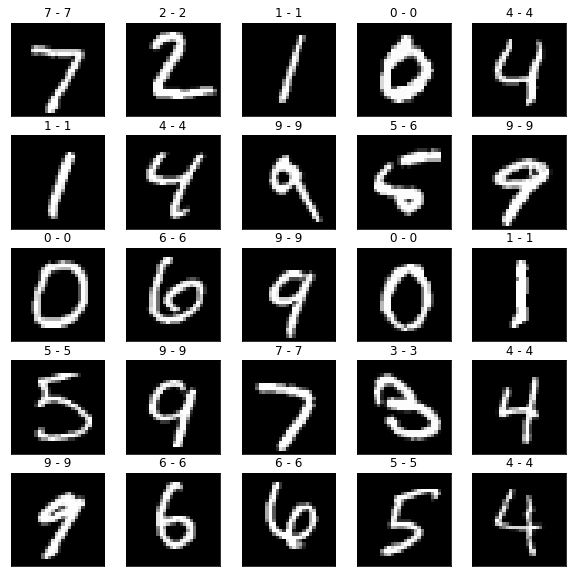

In [17]:
plt.figure(figsize=(10, 10))

start = 0
for idx in range(25):
    plt.subplot(5,5,idx+1)
    fig = plt.imshow(x_test[idx+start], cmap='gray')
    plt.title('{} - {}'.format(y_test[idx+start], np.argmax(model.predict(x_test[idx+start].reshape(1, 28, 28)))))
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
